0.19915557573470208
0.20950350792681402


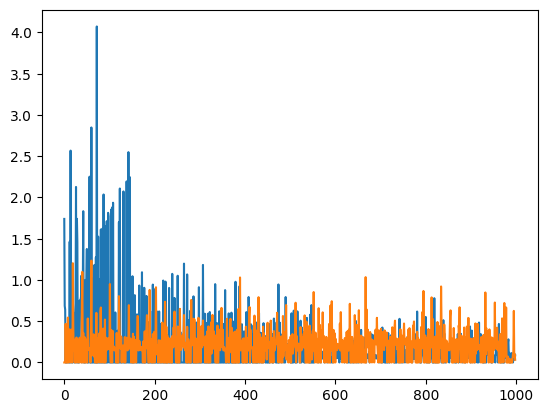

In [16]:
import json
import os
import matplotlib.pyplot as plt

name = "1000-1000-50"

ours_path = f"results/ours-{name}-tp.json"
with open(ours_path) as f:
    ours_data = json.load(f)
ours_lats = ours_data['req_end_deltas']

vllm_path = f"results/vllm-{name}-tp.json"
with open(vllm_path) as f:
    vllm_data = json.load(f)
vllm_lats = vllm_data['req_end_deltas']

xs = len(ours_lats)
plt.plot(range(xs), ours_lats, label="Ours")
plt.plot(range(xs), vllm_lats, label="VLLM")

print(sum(ours_lats) / xs)
print(sum(vllm_lats) / xs)

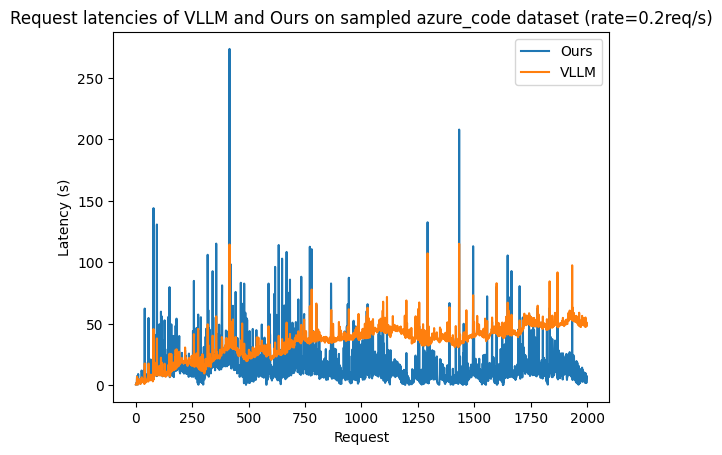

In [15]:
import json
import os
import matplotlib.pyplot as plt

ours_path = "results/ours-azure_code-lat-2_9.json"
with open(ours_path) as f:
    ours_data = json.load(f)
ours_lats = [x['end'] - x['start'] for x in ours_data]

vllm_path = "results/vllm-azure_code-lat-2_9.json"
with open(vllm_path) as f:
    vllm_data = json.load(f)
vllm_lats = [x['end'] - x['start'] for x in vllm_data]

xs = len(ours_lats)
# ours_lats = sorted(ours_lats)
# vllm_lats = sorted(vllm_lats)
plt.plot(range(xs), ours_lats, label="Ours")
plt.plot(range(xs), vllm_lats, label="VLLM")
plt.xlabel("Request")
plt.ylabel("Latency (s)")
plt.title("Request latencies of VLLM and Ours on sampled azure_code dataset (rate=0.2req/s)")

plt.legend()

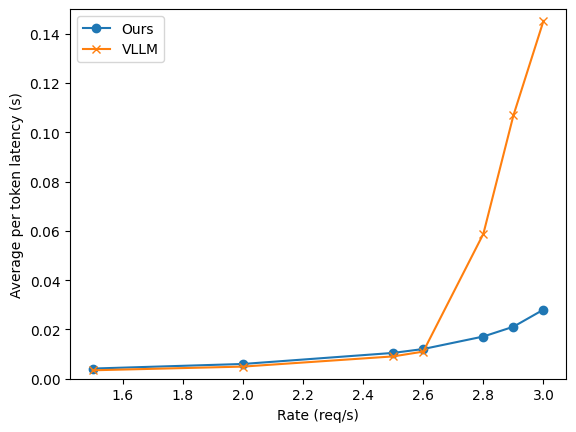

In [22]:
import json
import matplotlib.pyplot as plt


def get_lat_avg(file):
    with open(file) as f:
        data = json.load(f)
    # only take latter half
    data = data[len(data) // 2:]
    return sum([(x['end'] - x['start']) / (x['input_len'] + x['output_len']) for x in data]) / len(data)


rates = [1.5, 2.0, 2.5, 2.6, 2.8, 2.9, 3.0]
data_name = "azure_code"
ours_lats = []
vllm_lats = []
for rate in rates:
    rate_str = str(rate).replace(".", "_")
    ours_lats.append(get_lat_avg(f"results/ours-{data_name}-lat-{rate_str}.json"))
    vllm_lats.append(get_lat_avg(f"results/vllm-{data_name}-lat-{rate_str}.json"))

plt.plot(rates, ours_lats, label="Ours", marker='o')
plt.plot(rates, vllm_lats, label="VLLM", marker='x')
plt.xlabel("Rate (req/s)")
plt.ylabel("Average per token latency (s)")
plt.ylim(0, 0.15)
plt.legend()
